In [229]:
import numpy as np 
import matplotlib.pyplot as plt

In [230]:
N, M = 20, 9

In [231]:
T_max = 1

In [232]:
h, tau = 1 / N, T_max / M
h, tau

(0.05, 0.1111111111111111)

In [233]:
a = 0.1

In [234]:
a * tau / h

0.2222222222222222

In [235]:
X = np.linspace(0, 1, N + 1)
T = np.linspace(0, T_max, M + 1)
T

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [236]:
def gamma_0_1(t):
    return 0 


def gamma_1_1(t):
    return 0

def gamma_0_2(t):
    return t 


def gamma_1_2(t):
    return -(t ** 2) * (1 + t)

In [237]:
def phi_1(x, t):
    return (t ** 2) * x * (x - 1)


def psi_1(x):
    return x * (1 - x)


def phi_2(x, t):
    return 0


def psi_2(x):
    return 0

$$
u_i^1=u_i^0+\tau \psi(x_i) + \dfrac{a^2\tau^2}{2}\phi''(x_i)
$$

$$
u_t(x, t) = a^2 u_{xx}(x, t) + \phi(x, t)
$$

$$

\dfrac{u_i^{j+1} - u_i^j}{\tau}

=

\dfrac{a^{2}}{h^{2}}\left( u^{j}_{i + 1} - 2u_{i}^{j} + u^{j}_{i - 1} \right) + \phi(x, t)

$$

# Явный 1

In [238]:
Y = np.zeros((N + 1, M + 1))

In [239]:
Y[::,0] = psi_1(X)

In [240]:
Y[0,::] = gamma_0_1(T)
Y[-1,::] = gamma_1_1(T)

$$

u_i^{j+1}

=

\dfrac{a^{2} \tau}{h^{2}}\left( u^{j}_{i + 1} - 2u_{i}^{j} + u^{j}_{i - 1} \right) + \tau\phi(x, t) + u_i^j

$$

In [241]:
for j in range(0, M):
    for i in range(1, N):
        Y[i, j + 1] = ((a ** 2) * tau / (h ** 2)) * (Y[i + 1, j] - 2 * Y[i, j] + Y[i - 1, j]) + tau * phi_1(X[i], T[j + 1]) + Y[i, j]

In [242]:
T.shape, X.shape, Y.shape

((10,), (21,), (21, 10))

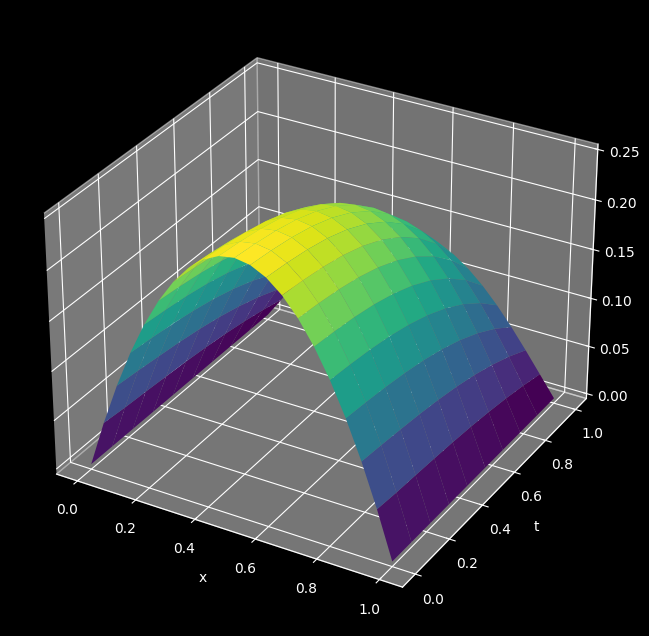

In [243]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X, T)

ax.plot_surface(X_g, T_g, Y.T, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

# Не явный 1

$$
\dfrac{u_i^{j+1} - u_i^j}{\tau} = a^2 \dfrac{u^{j+1}_{i + 1} - 2u_{i}^{j+1} + u_{i - 1}^{j+1}}{h^2} + \phi(x, t)
$$

$$
u_i^{j+1} - u_i^j = \tau a^2 \dfrac{u^{j+1}_{i + 1} - 2u_{i}^{j+1} + u_{i - 1}^{j+1}}{h^2} + \tau \phi(x, t)
$$

$$
h^2 u_i^{j+1} - h^2 u_i^j = \tau a^2 (u^{j+1}_{i + 1} - 2u_{i}^{j+1} + u_{i - 1}^{j+1}) + \tau h^2 \phi(x, t)
$$

In [244]:
Y = np.zeros((N + 1, M + 1))

In [245]:
Y[::,0] = psi_1(X)

In [246]:
Y[0,::] = gamma_0_1(T)
Y[-1,::] = gamma_1_1(T)

In [247]:
for j in range(1, M + 1):

    A = np.zeros((N + 1, N + 1))
    b = np.zeros(N + 1)

    A[0, 0] = 1
    b[0] = gamma_0_1(T[j])

    A[-1, -1] = 1
    b[-1] = gamma_1_1(T[j])

    for i in range(1, N):
        A[i][i - 1] = -tau * (a ** 2)
        A[i][i] = h ** 2 + 2 * tau * (a ** 2)
        A[i][i + 1] = -tau * a ** 2

        b[i] = tau * (h ** 2) * phi_1(X[i], T[j]) + (h ** 2) * Y[i, j - 1]

    Y[::, j] = np.linalg.solve(A, b)

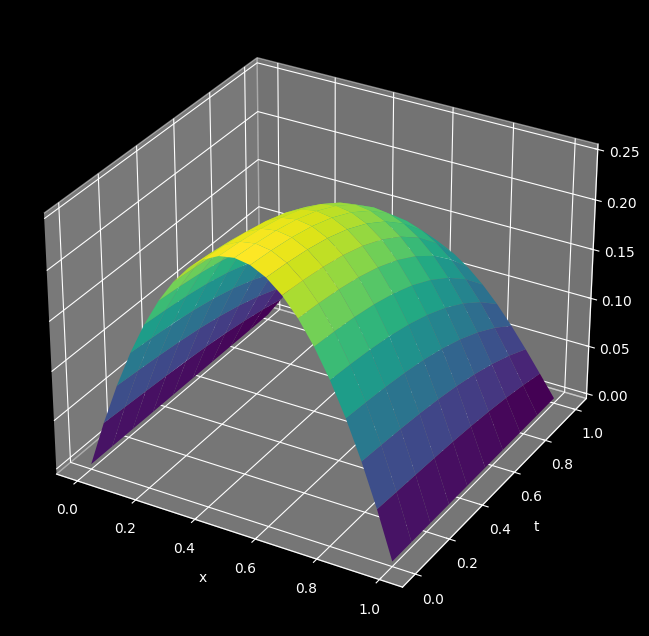

In [248]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X, T)

ax.plot_surface(X_g, T_g, Y.T, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

# Явный 2

In [249]:
N, M = 20, 9

In [250]:
T_max = 1

In [251]:
h, tau = 1 / N, T_max / M
h, tau

(0.05, 0.1111111111111111)

In [252]:
a = 0.1

In [253]:
a * tau / h

0.2222222222222222

In [254]:
Y = np.zeros((N + 1, M + 1))

In [255]:
Y[::,0] = psi_2(X)

In [256]:
Y[0,::] = gamma_0_2(T)
Y[-1,::] = gamma_1_2(T)

In [257]:
for j in range(0, 1):
    for i in range(1, N):
        Y[i, j + 1] = ((a ** 2) * tau / (h ** 2)) * (Y[i + 1, j] - 2 * Y[i, j] + Y[i - 1, j]) + tau * phi_2(X[i], T[j + 1]) + Y[i, j]

In [258]:
Y

array([[ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
         0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

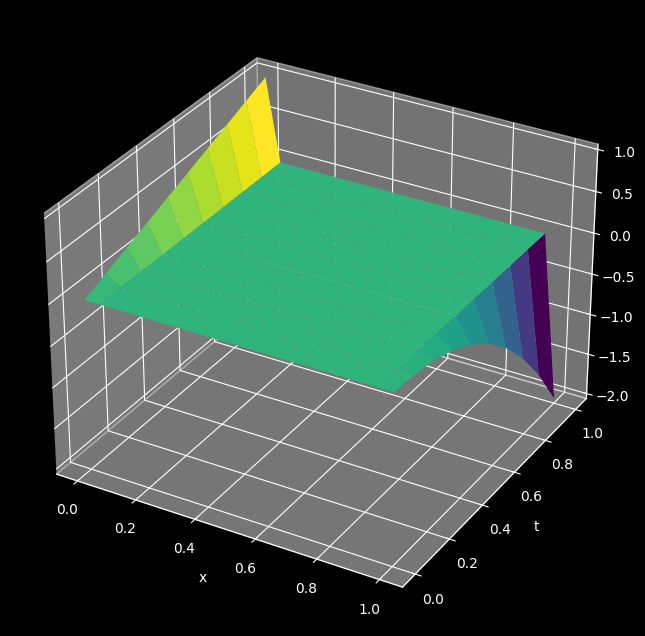

In [259]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X, T)

ax.plot_surface(X_g, T_g, Y.T, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

# Не явный 2

In [260]:
Y = np.zeros((N + 1, M + 1))

In [261]:
Y[::,0] = psi_2(X)

In [262]:
Y[0,::] = gamma_0_2(T)
Y[-1,::] = gamma_1_2(T)

In [263]:
for j in range(1, M + 1):

    A = np.zeros((N + 1, N + 1))
    b = np.zeros(N + 1)

    A[0, 0] = 1
    b[0] = gamma_0_2(T[j])

    A[-1, -1] = 1
    b[-1] = gamma_1_2(T[j])

    for i in range(1, N):
        A[i][i - 1] = -tau * (a ** 2)
        A[i][i] = h ** 2 + 2 * tau * (a ** 2)
        A[i][i + 1] = -tau * a ** 2

        b[i] = tau * (h ** 2) * phi_2(X[i], T[j]) + (h ** 2) * Y[i, j - 1]

    Y[::, j] = np.linalg.solve(A, b)

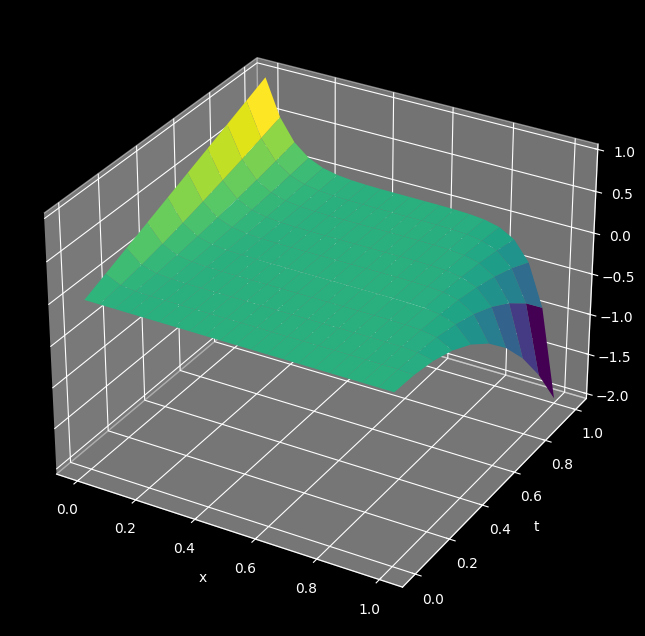

In [264]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X, T)

ax.plot_surface(X_g, T_g, Y.T, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()